<a href="https://colab.research.google.com/github/ridlofebrio/PCVK_GANJIL_2024/blob/main/PCVK_Modul10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Muhammad Ridlo Febrio Putra
### 2241720098

In [ ]:
import cv2 as cv, cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.


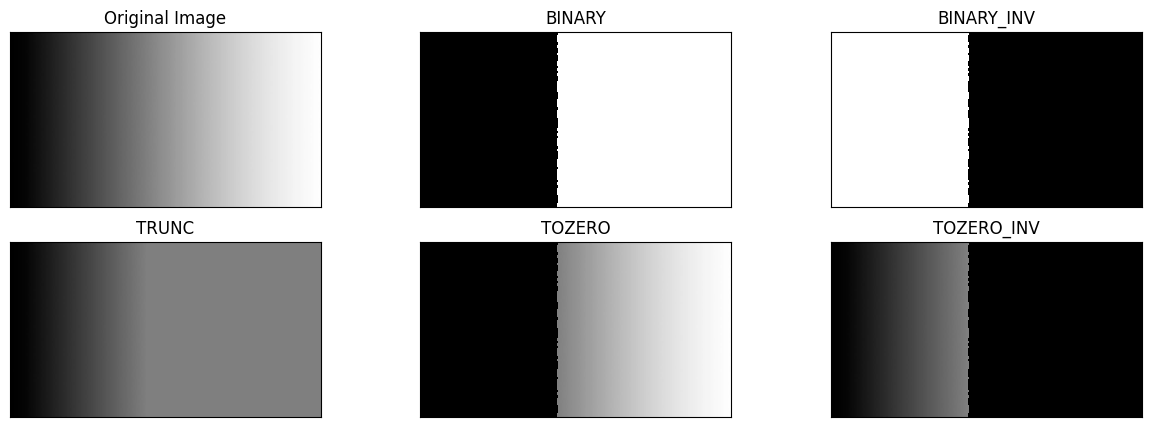

In [ ]:
filename = ('/content/drive/MyDrive/image/gradient.jpg')
img = cv.imread(filename)
thresh = 127
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

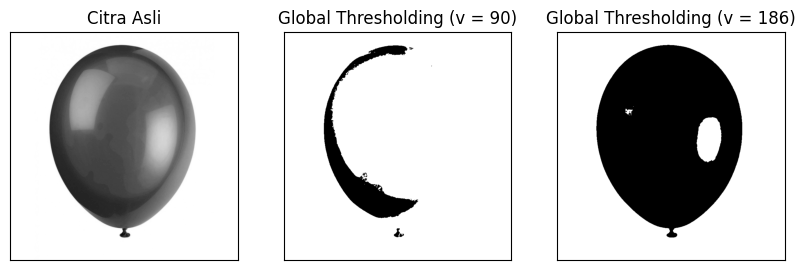

In [ ]:
filename = ('/content/drive/MyDrive/image/balloon.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)

thresh =[90,186]

ret,th1 = cv.threshold(gray,thresh[0],255,cv.THRESH_BINARY)

ret,th2 = cv.threshold(gray,thresh[1],255,cv.THRESH_BINARY)


titles = ['Citra Asli', 'Global Thresholding (v = 90)', 'Global Thresholding (v = 186)']
citra2 = [gray, th1, th2 ]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,3,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()


5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.

Petunjuk: <br>
a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.
<br>
b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
<br>
c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

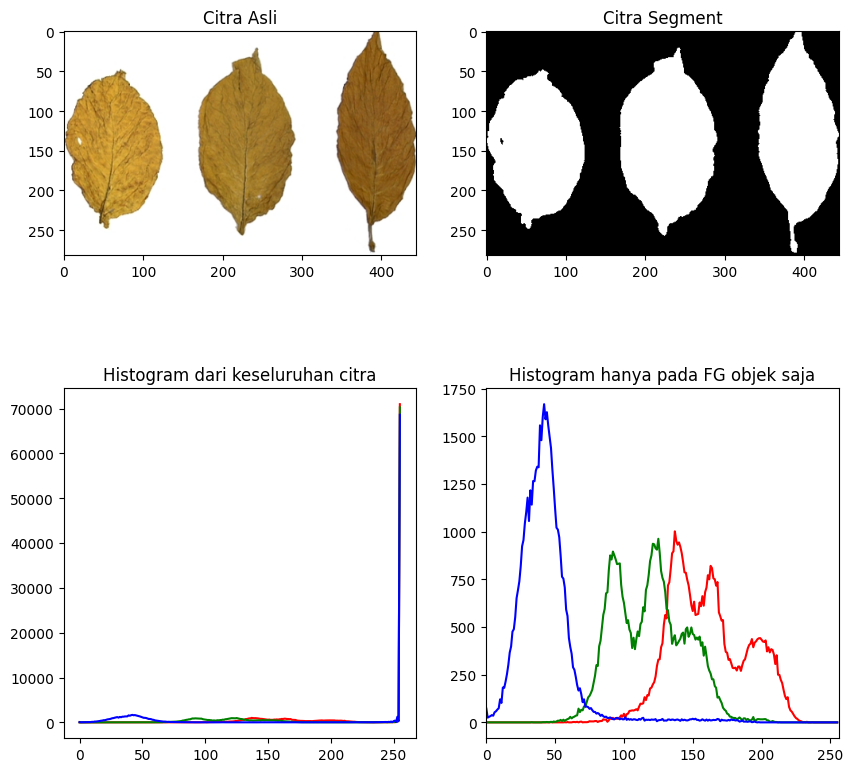

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/image/tobacco.jpg')

img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):

    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')

    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

Cluster Centers (RGB): [[169  18  15]
 [250 206   2]
 [ 94 119  21]
 [253 252 250]
 [200  85  79]
 [190 181 131]]


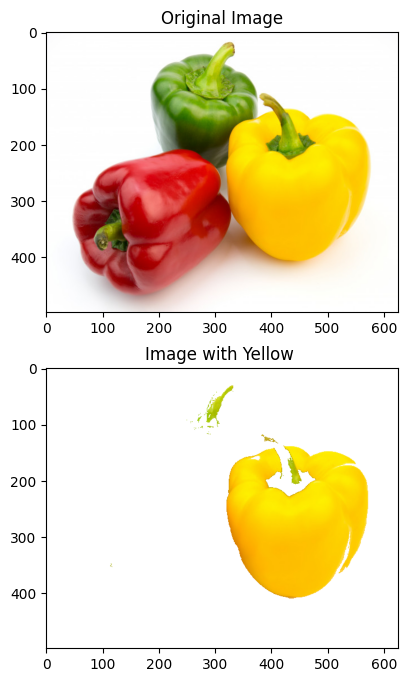

In [ ]:

# Load and convert the image to RGB
img = cv2.imread('/content/drive/MyDrive/image/peppers.jpg')  # Replace with your image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values for K-Means
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6  # Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to integers
centers = np.uint8(centers)

# Reshape the labels array back to the original image shape (height, width)
labels = labels.reshape(img.shape[:2])

# Display the cluster centers (to identify the yellow color)
print("Cluster Centers (RGB):", centers)

# Define the range for yellow in RGB space
yellow_index = np.argmin(np.sum(np.abs(centers - [255, 255, 0]), axis=1))  # Yellow is approx. [255, 255, 0]

# Create a white background image
yellow_with_white_bg = np.ones_like(img) * 255  # Set everything to white (255, 255, 255)

# Replace only the yellow pixels with the original yellow ones
yellow_with_white_bg[labels == yellow_index] = img[labels == yellow_index]

# Display the original and the yellow object with white background
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 3)
plt.imshow(yellow_with_white_bg)
plt.title('Image with Yellow ')

plt.show()


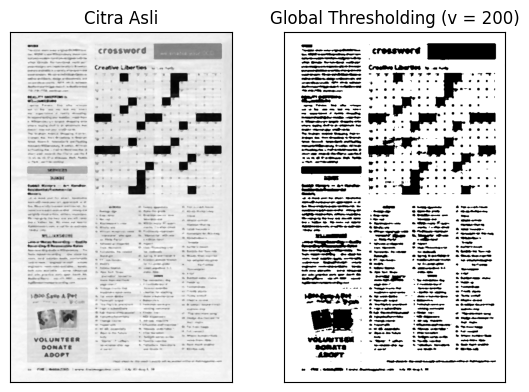

In [ ]:
filename = ('/content/drive/MyDrive/image/crossword.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)

thresh =200

ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 200)']
citra2 = [gray, th1]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,3,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()